In [158]:
import plotly.express as px
import pandas as pd
import LightSensor
from datetime import datetime, timedelta
import time
import RPi.GPIO as GPIO

(array([52.,  0.,  0.,  0.,  0.,  3.,  1.,  1.,  2.,  1.]),
 array([    0. ,  2452.5,  4905. ,  7357.5,  9810. , 12262.5, 14715. ,
        17167.5, 19620. , 22072.5, 24525. ]),
 <a list of 10 Patch objects>)

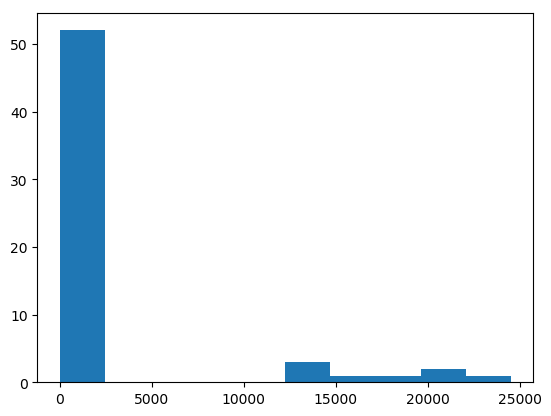

In [17]:
import matplotlib.pyplot as plt
import numpy as np

counts, bins = np.histogram(data_with_outliers)
plt.hist(bins[:-1], bins, weights=counts)

(array([ 8.,  0.,  0.,  0., 35.,  1.,  5.,  1.,  0.,  2.]),
 array([  0. ,  88.9, 177.8, 266.7, 355.6, 444.5, 533.4, 622.3, 711.2,
        800.1, 889. ]),
 <a list of 10 Patch objects>)

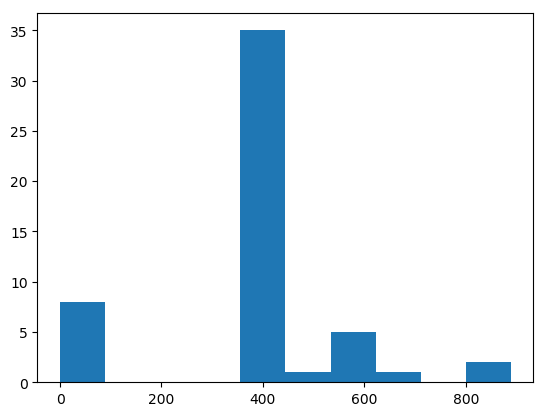

In [39]:
from statistics import mean
values = [889, 377, 383, 385, 856, 382, 380, 384, 0, 19631, 633, 386, 385, 375, 0, 380, 379, 386, 387, 387, 0, 579, 604, 389, 383, 388, 0, 378, 386, 381, 386, 442, 0, 582, 584, 393, 394, 384, 0, 518, 393, 394, 389, 392, 0, 24525, 13374, 15092, 20308, 13477, 13450, 19224, 395, 393, 388, 586, 0, 388, 387, 388]

threshold = mean(values)
values = [val for val in values if val <= threshold]

counts, bins = np.histogram(values)
plt.hist(bins[:-1], bins, weights=counts)

1.3877787807814457e-16

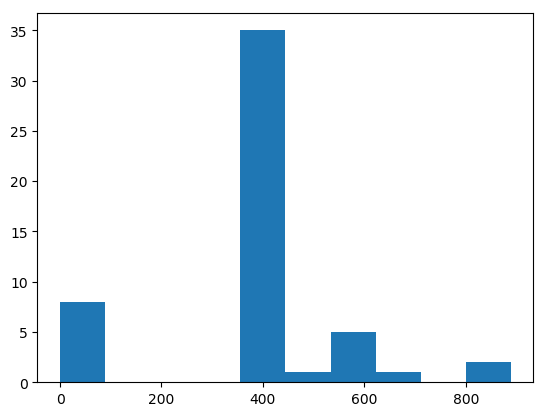

In [54]:
from statistics import mean
values = [889, 377, 383, 385, 856, 382, 380, 384, 0, 19631, 633, 386, 385, 375, 0, 380, 379, 386, 387, 387, 0, 579, 604, 389, 383, 388, 0, 378, 386, 381, 386, 442, 0, 582, 584, 393, 394, 384, 0, 518, 393, 394, 389, 392, 0, 24525, 13374, 15092, 20308, 13477, 13450, 19224, 395, 393, 388, 586, 0, 388, 387, 388]

mean = sum(values) / len(values)
differences = [(value - mean)**2 for value in values]
sum_of_differences = sum(differences)
standard_deviation = (sum_of_differences / (len(values) - 1)) ** 0.5

zscores = [(value - mean) / standard_deviation for value in values]

newVals = []
threshold = 1.78
for ind, z in enumerate(zscores):
    if abs(z) <= threshold:
        # print(f'values[{ind}]: {z} from {values[ind]}')
        newVals.append(values[ind])
        
counts, bins = np.histogram(newVals)
plt.hist(bins[:-1], bins, weights=counts)

In [159]:
def lineGraph(inputArr):
    inputFrame = pd.DataFrame(inputArr, columns=['Light Readings'])
    fig = px.line(inputFrame, y="Light Readings", text='Light Readings')
    fig.update_traces(textposition='top center', textfont_size=1)
    fig.show()

In [160]:
indoorSensor = LightSensor.LightSensor(8, "IndoorSensor")

IndoorSensor is initialized


In [52]:
%timeit indoorSensor.chargeTiming()

178 ms ± 1.11 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [165]:
readings = []
currentTimeIncrement = 0
timeUnitAmount = 1440 # minutes in a day
SEC_IN_MIN = 60
now = time.time()

time.sleep(1)
while(1):
    if currentMinute == timeUnitAmount:
        break

    readings.append(indoorSensor.chargeTiming())
    time.sleep(60)
            
print("Done")

It has been 1 minutes
It has been 2 minutes
It has been 3 minutes
It has been 4 minutes
It has been 5 minutes
Done


In [ ]:
GPIO.cleanup()

In [148]:
int(time.time() - now) % 10 == 0

False

In [55]:
minReading = min(readings)
maxReading = max(readings)
normalizedReadings = [1 - (i - minReading) / (maxReading - minReading) for i in readings]

ValueError: min() arg is an empty sequence

In [ ]:
lineGraph(normalizedReadings)

In [7]:
darkPoints = [i for i in normalizedReadings if i < .80]
lineGraph(darkPoints)